# Case Itau

## Importar bibliotecas

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Variable | Description
---------|------------
Date   |  The date of observation
Location   |  The common name of the location of the weather station
MinTemp   |  The minimum temperature in degrees celsius
MaxTemp   |  The maximum temperature in degrees celsius
Rainfall   |  The amount of rainfall recorded for the day in mm
Evaporation   |  The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine   |  The number of hours of bright sunshine in the day.
WindGustDir   |  The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed   |  The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am   |  Direction of the wind at 9am
WindDir3pm   |  Direction of the wind at 3pm
WindSpeed9am   |  Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm   |  Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am   |  Humidity (percent) at 9am
Humidity3pm   |  Humidity (percent) at 3pm
Pressure9am   |  Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm   |  Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am   |  Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
Cloud3pm | Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
Temp9am |  Temperature (degrees C) at 9am
Temp3pm |  Temperature (degrees C) at 3pm
Precipitation9am |  The amount of rain in mm prior to 9am
Precipitation3pm |  The amount of rain in mm prior to 3pm
AmountOfRain |  The amount of rain in mm
Temp |  Temperature (degrees C)
Humidity |  Humidity (percent)
RainToday |  Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow |  The target variable. Did it rain tomorrow?

## Importar arquivos

In [2]:
pwd

'C:\\Users\\victo\\Documents\\Ironhack\\Projetos\\Case-Itau'

In [27]:
rain_aus=pd.read_csv('./data/rain_data_aus.csv')
wind_01=pd.read_csv('./data/wind_table_01.csv')
wind_02=pd.read_csv('./data/wind_table_02.csv')
wind_03=pd.read_csv('./data/wind_table_03.csv')
wind_04=pd.read_csv('./data/wind_table_04.csv')
wind_05=pd.read_csv('./data/wind_table_05.csv')
wind_06=pd.read_csv('./data/wind_table_06.csv')
wind_07=pd.read_csv('./data/wind_table_07.csv')
wind_08=pd.read_csv('./data/wind_table_08.csv')
rain_aus.head(3)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580


In [30]:
rain_aus['sunshine'].unique()

array([ nan, 12.3, 13. , 13.3, 10.6, 12.2,  8.4,  0. , 12.6, 13.2, 12.7,
       12.1, 10.3, 13.1, 12.9, 11.3,  6.9, 10.9,  3.7,  5.9, 10.5, 12.4,
       13.4, 13.6,  7.4, 10. ,  2.3,  6.6,  0.3, 10.7, 11.6, 10.2,  9. ,
       12. ,  3. ,  7.9, 11.5, 11.2,  4.8,  5.8,  6. , 11.1, 11.8, 11.4,
       10.8,  7.8, 11. ,  5.5,  4.7,  4.2,  4.4,  6.2,  9.8,  9.9,  4.3,
        8. ,  9.6, 10.4,  9.3,  8.7,  7.6,  7.5, 10.1,  6.3,  2.8,  0.7,
        9.4,  9.7,  0.6,  5.1,  8.3,  4.1,  3.9,  6.8,  8.6,  2.7,  8.2,
        3.1,  1.8,  0.1,  0.8,  3.4,  7.1,  5. ,  5.7,  6.1,  7. ,  2.9,
        2.5,  4.6,  8.9,  9.1,  1.7,  8.1,  9.5,  1.2,  1.4,  8.8,  2.2,
        3.5,  9.2,  1.9, 11.7, 11.9,  7.7,  0.9, 12.5,  2.1, 12.8, 13.7,
        8.5,  0.2,  4. ,  2.4,  5.2,  0.5,  6.4,  4.5,  1.1,  2. ,  0.4,
        1.5,  3.3,  6.5,  2.6,  3.8,  3.6,  3.2,  6.7,  5.4,  7.2,  4.9,
        1. ,  1.6,  5.3,  7.3,  5.6,  1.3, 13.8, 13.5, 14. , 13.9, 14.1,
       14.5, 14.3, 14.2])

### Exploring data

In [15]:
rain_aus.shape

(142193, 23)

In [41]:
wind_01.shape, wind_02.shape, wind_03.shape, wind_04.shape, wind_05.shape, wind_06.shape, wind_07.shape, wind_08.shape

((20000, 8),
 (20000, 8),
 (20000, 8),
 (20000, 8),
 (20000, 8),
 (20000, 8),
 (22193, 8),
 (22193, 8))

In [20]:
wind_01.head(3)

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0


In [21]:
wind_02.head(3)

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2010-01-25,SydneyAirport,E,31.0,ESE,E,7.0,22.0
1,2010-01-25,WaggaWagga,W,33.0,ENE,WSW,11.0,19.0
2,2010-01-25,Williamtown,E,39.0,SSW,ESE,11.0,22.0


In [22]:
wind_03.head(3)

,date,location,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2011-05-14,NorfolkIsland,WNW,50.0,W,WNW,2.0,19.0
1,2011-05-14,Penrith,SW,41.0,SW,SW,13.0,19.0
2,2011-05-14,Richmond,SW,41.0,WSW,SW,19.0,22.0


### Transforming all the wind's df's into just 1

In [26]:
wind_01.isna().sum()

date                 0
location             0
wind_gustdir      2134
wind_gustspeed    2131
wind_dir9am       1436
wind_dir3pm        530
wind_speed9am      386
wind_speed3pm      391
dtype: int64

In [39]:
frames=[wind_01, wind_02, wind_03, wind_04, wind_05, wind_06, wind_07, wind_08]

In [43]:
wind = pd.concat(frames)
wind.head(3)

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
wind.shape

(164386, 14)

## 2.1 Using Heatmap to find correlations between data

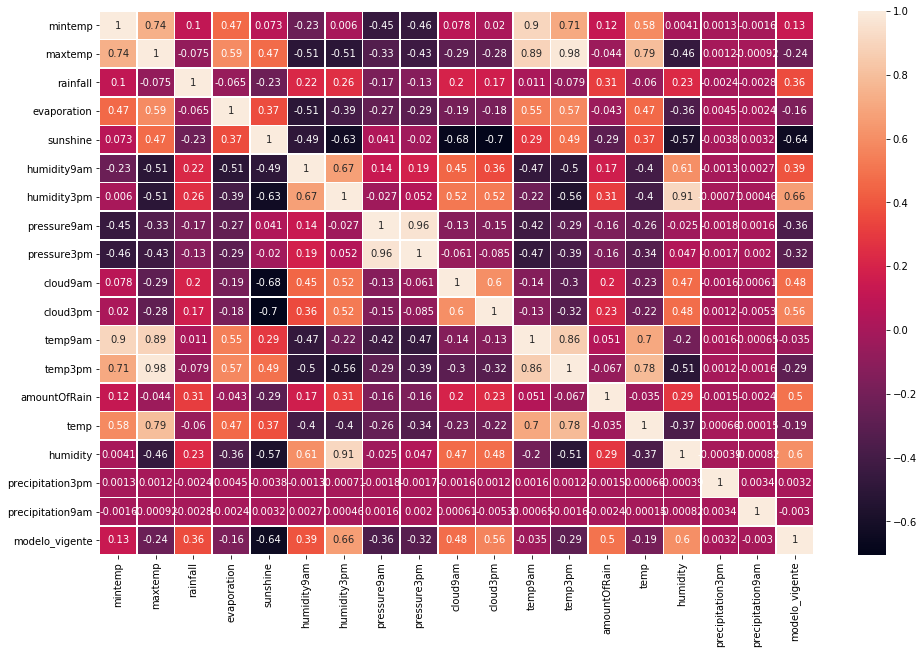

In [48]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(rain_aus.corr(),annot=True,linewidths=.5)

In [66]:
## Setting numerical columns to work with 

In [92]:
numeric = ['mintemp','maxtemp','rainfall','sunshine','humidity9am','humidity3pm','pressure9am','pressure3pm','temp9am','temp3pm','temp','humidity','precipitation3pm','precipitation9am']

In [67]:
rain_aus[numeric].head(3)

,mintemp,maxtemp,rainfall,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,temp,humidity,precipitation3pm,precipitation9am
0,13.4,22.9,0.6,NaN,71.0,22.0,1007.7,1007.1,16.9,21.8,29.48,28.400000,12,5.115360
1,7.4,25.1,0.0,NaN,44.0,25.0,1010.6,1007.8,17.2,24.3,32.12,2.208569,10,21.497100
2,12.9,25.7,0.0,NaN,38.0,30.0,1007.6,1008.7,21.0,23.2,32.84,38.000000,17,20.782859


In [99]:
rain_aus[numeric].isna().sum()

mintemp               637
maxtemp               322
rainfall             1406
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
temp9am               904
temp3pm              2726
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
dtype: int64

In [100]:
rain_aus2=rain_aus[numeric].fillna(0)

In [101]:
rain_aus2.isna().sum()

mintemp             0
maxtemp             0
rainfall            0
sunshine            0
humidity9am         0
humidity3pm         0
pressure9am         0
pressure3pm         0
temp9am             0
temp3pm             0
temp                0
humidity            0
precipitation3pm    0
precipitation9am    0
dtype: int64

In [72]:
rain_aus.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente'],
      dtype='object')

## 3. Data processing

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [80]:
from sklearn.cluster import KMeans

In [83]:
scaler = StandardScaler()

In [102]:
rain_numeric=rain_aus2[numeric]

In [103]:
scaler.fit(rain_numeric)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [104]:
scaled = scaler.transform(rain_numeric)

In [105]:
scaled

array([[ 0.19690834, -0.03810929, -0.20492006, ..., -1.14113051,
         0.6264822 , -0.97748989],
       [-0.73469264,  0.26766956, -0.27612488, ..., -2.07461956,
        -0.00446834,  2.30024095],
       [ 0.11927493,  0.35106379, -0.27612488, ..., -0.79897682,
         2.20385855,  2.1573325 ],
       ...,
       [-1.3247066 ,  0.29546763, -0.27612488, ..., -1.18389972,
        -0.31994361,  1.9438658 ],
       [-1.04522631,  0.51785224, -0.27612488, ..., -1.05559209,
         0.6264822 , -1.80380033],
       [-0.67258591,  0.53175128, -0.27612488, ..., -1.05559209,
         1.57290801, -1.12432761]])

In [106]:
scaled = pd.DataFrame(scaled, columns = numeric)
scaled

,mintemp,maxtemp,rainfall,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,temp,humidity,precipitation3pm,precipitation9am
0,0.196908,-0.038109,-0.204920,-0.850637,0.147682,-1.276568,0.297764,0.303160,0.003099,0.070596,0.100737,-1.141131,0.626482,-0.977490
1,-0.734693,0.267670,-0.276125,-0.850637,-1.174810,-1.140645,0.307322,0.305475,0.048475,0.404520,0.356669,-2.074620,-0.004468,2.300241
2,0.119275,0.351064,-0.276125,-0.850637,-1.468697,-0.914107,0.297435,0.308451,0.623233,0.257594,0.426469,-0.798977,2.203859,2.157332
3,-0.455212,0.670742,-0.276125,-0.850637,-1.125829,-1.548413,0.330394,0.322011,0.184602,0.698373,0.694034,-1.397746,-0.635419,0.405751
4,0.833502,1.268400,-0.157450,-0.850637,0.686476,-0.778184,0.307982,0.299522,0.139226,1.125796,1.194264,-0.670669,-0.319944,0.376719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,-1.340233,-0.190999,-0.276125,-0.850637,-0.440092,-1.050029,0.353795,0.349791,-1.131292,-0.049617,-0.027228,-0.927284,0.626482,-0.830764
142189,-1.448920,0.031386,-0.276125,-0.850637,-0.831941,-1.185952,0.353466,0.346815,-1.025416,0.150738,0.158904,-1.055592,-0.004468,-0.669656
142190,-1.324707,0.295468,-0.276125,-0.850637,-0.587035,-1.321875,0.349840,0.342846,-0.904414,0.431234,0.379936,-1.183900,-0.319944,1.943866
142191,-1.045226,0.517852,-0.276125,-0.850637,-0.733979,-1.185952,0.341600,0.335239,-0.662410,0.644945,0.566068,-1.055592,0.626482,-1.803800


In [113]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [114]:
rain_aus2['Labels']=kmeans.labels_
rain_aus2.head(3)

,mintemp,maxtemp,rainfall,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,temp,humidity,precipitation3pm,precipitation9am,Labels
0,13.4,22.9,0.6,0.0,71.0,22.0,1007.7,1007.1,16.9,21.8,29.48,28.400000,12,5.115360,1
1,7.4,25.1,0.0,0.0,44.0,25.0,1010.6,1007.8,17.2,24.3,32.12,2.208569,10,21.497100,1
2,12.9,25.7,0.0,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,32.84,38.000000,17,20.782859,1


## Using PCA

In [115]:
pca = PCA(2)

rain_aus_std = StandardScaler().fit_transform(rain_numeric)
pca.fit(rain_aus_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [116]:
pc1 = pca.transform(rain_aus2[numeric])[:, 0]
pc2 = pca.transform(rain_aus2[numeric])[:, 1]

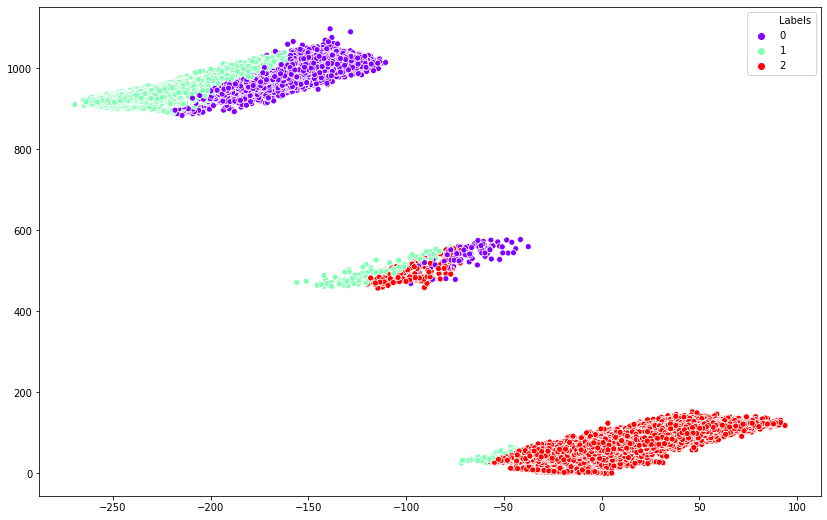

In [117]:
fig, ax = plt.subplots(figsize=(14,9))

sns.scatterplot(pc1, pc2, hue=rain_aus2['Labels'],palette='rainbow')
plt.show()

In [81]:
pd.DataFrame(rain_aus.loc[1,:])

,1
date,2008-12-02
location,Albury
mintemp,7.4
maxtemp,25.1
rainfall,0
evaporation,NaN
sunshine,NaN
humidity9am,44
humidity3pm,25
pressure9am,1010.6
